# ABSTRACT 
The project will be on predicting Netflix Movies and TV Shows based on personal history viewing using recommendation system. In order to help understand people preference and how Netflix shape similar catalog of movies and TV shows using genres, title, and release year as features. Netflix Main business is its subscription-based streaming service, which provide online streaming of a collection of films and television series, including those produced in-house. The project is using TV Shows and Movies listed on the Netflix dataset from Kaggle. First, Exploratory Data Analysis (EDA) will be presented to understand and describe the data in a better way through interactive graphs and visualizations. After that, a recommendation engine for Movies and TV shows on Netflix is demonstrated.

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
import collections
warnings.filterwarnings('ignore')


In [44]:
netflix=pd.read_csv("/Users/dina/Desktop/PROJECT/netflix_titles.csv")

In [45]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [46]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [47]:
netflix.shape

(8807, 12)

# Data Description:
Primarily there 8807 records in 12 columns.

FEATURES:

- show_id: unique id of each show
- type: The category of a show, can be either a Movie or a TV Show
- title: Name of the show
- director: Name of the director(s) of the show
- cast: Name of actors and other cast of the show
- country: Name of countries the show is available to watch on Netflix
- date_added: Date when the show was added on Netflix
- release_year: Release year of the show
- rating: Show rating on netflix
- duration: Time duration of the show
- listed_in: Genre of the show
- description: Some text describing the show

In [48]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [49]:
netflix.duplicated().sum()

0

# Data Preparation and Cleaning

Identifying incorrect, incomplete, inaccurate, irrelevant, or missing pieces of data and then modifying, replacing, or deleting them as needed. Data Cleansing is considered as the basic element of Data Science.

In [50]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


From the info, we know that there are 8807 entries and 12 columns to work with for this EDA. There are a few columns that contain null values, "director", "cast", "country", "date_added", "rating".

Columns that have missing value

In [51]:
print('\nColumns with missing value:')
print(netflix.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


In [52]:
netflix.T.apply(lambda x: x.isnull().sum(), axis = 1)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [53]:
netflix.isnull().sum().sum()

4307

There are a total of 4,307 null values across the entire dataset with 2,634 missing points under "director", 825 under "cast", 831 under "country", 10 under "date_added", and 4 under "rating". We will have to handle all null data points before we can dive into EDA and modeling.

Imputation is used as a treatment method for missing value in this project by filling it In this module,I used the fillna function from Pandas for this imputation. Drop rows containing missing values. Can use the dropna function from Pandas

In [54]:
netflix.director.fillna("No Director", inplace=True)
netflix.cast.fillna("No Cast", inplace=True)
netflix.country.fillna("Country Unavailable", inplace=True)
netflix.dropna(subset=["date_added", "rating"], inplace=True)

Check missing value

In [55]:
netflix.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration         True
listed_in       False
description     False
dtype: bool

For missing values, the easiest way to get rid of them would be to delete the rows with the missing data. However, this wouldn't be beneficial to our EDA since the is a loss of information. Since "director", "cast", and "country" contain the majority of null values, we chose to treat each missing value is unavailable. The other two label "date_added" and "rating" contain an insignificant portion of the data so it drops from the dataset. Finally, we can see that there are no more missing values in the data frame.

# ANALYSIS 
# HOW CONTENT IS DISTRIBUTED
Number of Movies or TV Shows?

Netflix primarily lists two types of contents -movies and TV-shows on their streaming site.

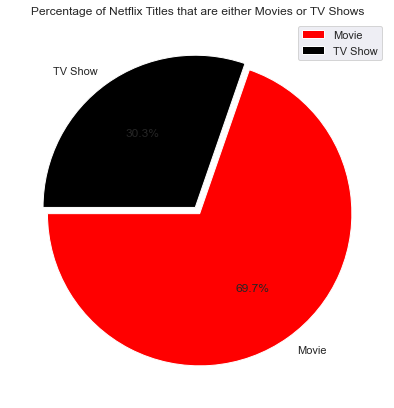

In [56]:
plt.figure(figsize=(13,7))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix.type.value_counts(), explode=(0.025,0.025), labels=netflix.type.value_counts().index, colors=['Red','Black'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

As shown in the Pie chart above it is evident that there are more Movies on Netflix than TV shows.

# Content ratings of the shows

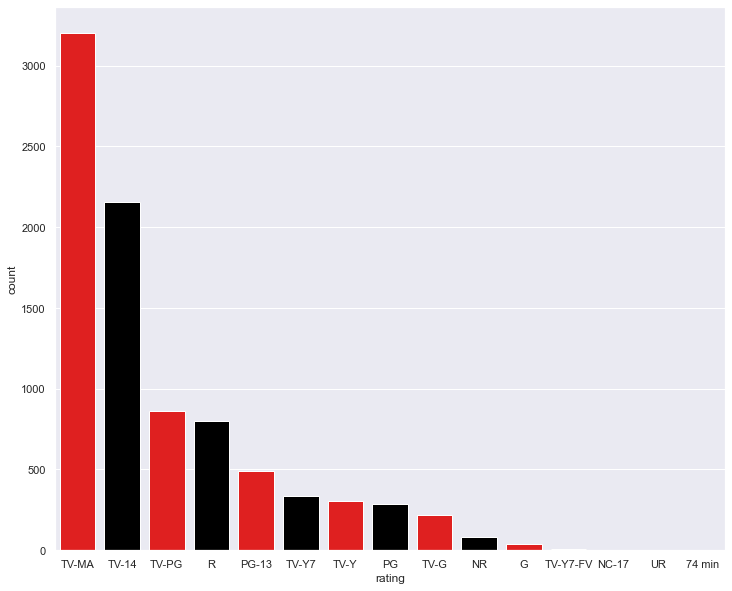

In [57]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix, palette=('Red','Black'), order=netflix['rating'].value_counts().index[0:15])

The chart shows that majority of Netflix content whether movies or TV-shows are rated TV-MA. This type of contents are for mature, adult audiences and therefore unsuitable for children. The second highest type of contents are for children that are 14 year-old and above. These are rated TV-14

# Top producing countries

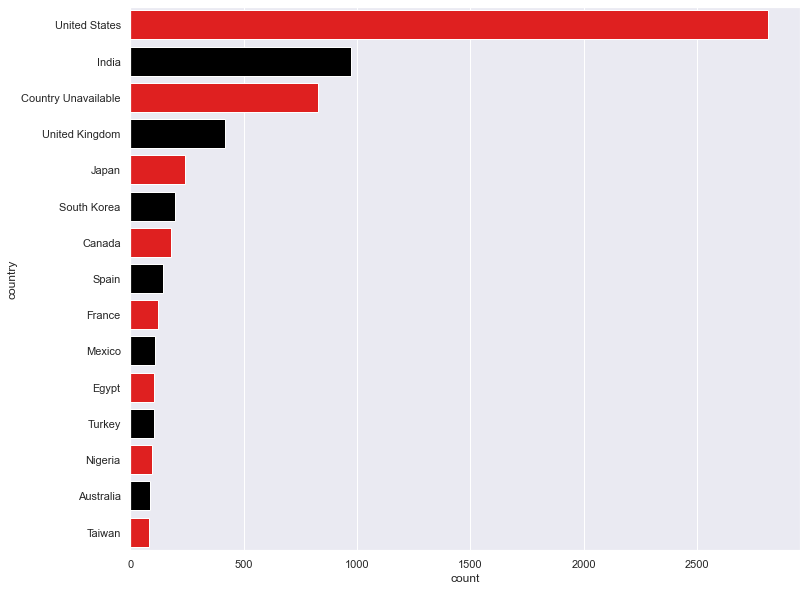

In [58]:
plt.figure(figsize=(12,10))

ax = sns.countplot(y="country", data=netflix, order=netflix['country'].value_counts().index[0:15],palette=('Red','Black'))

United States have highest rated content on the netflix.

# Movie and Tv Shows with Director Analysis

Text(0.5, 1.0, '30 Director and their total Movie count')

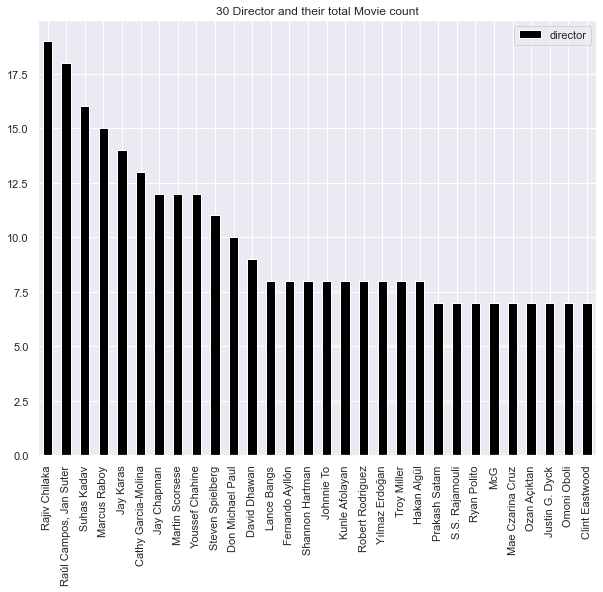

In [59]:
movie_director = netflix[netflix["type"]=="Movie"]
directorfilm = movie_director["director"].value_counts()[1:]
director_films = pd.DataFrame(directorfilm)

director_films[:30].plot(kind="bar",figsize=(10,8),  color='black')
plt.title("30 Director and their total Movie count")

Text(0.5, 1.0, '30 Director and their total TV Show count')

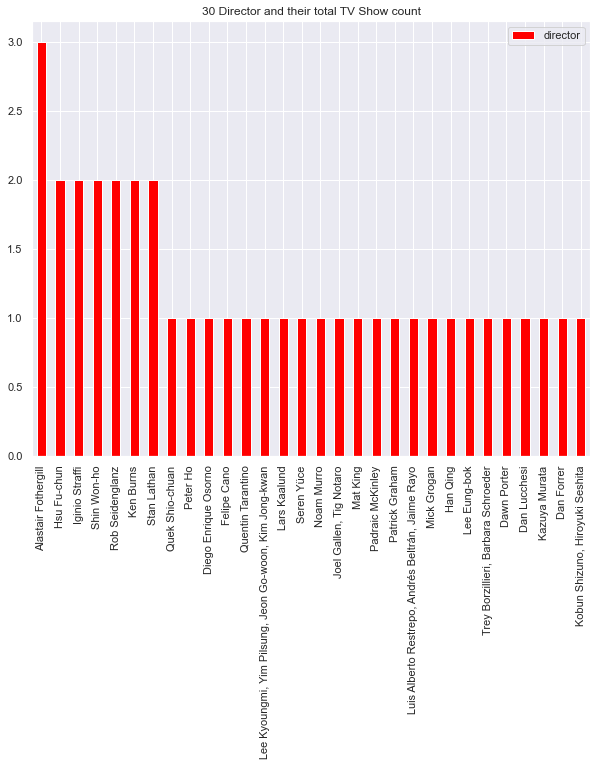

In [60]:
tv_director = netflix[netflix["type"]=="TV Show"]
directortv = tv_director["director"].value_counts()[1:]
director_tv = pd.DataFrame(directortv)
director_tv[:30].plot(kind="bar", figsize=(10,8),color='red')
plt.title("30 Director and their total TV Show count")

The most popular director on Netflix with the most titles
Rajiv Chilaka  (Movie)
Alastair Fothergill  (TV Show)

# Netflix Recommendation System

For this recommender system history is used to find its similarity with other TV shows. Content-based Filtering is a Machine Learning technique based on the similarity between content that the user has already consumed and the recommended.

In [61]:
netflix["listed_in"]

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8793, dtype: object

Now we will do value counts function to return a Series containing counts of unique values in descending order where the first element is the most frequently-occurring genre. Excludes NA values by default

In [62]:
netflix["listed_in"].value_counts()

Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: listed_in, Length: 513, dtype: int64

In [63]:
genres = pd.get_dummies(netflix["listed_in"])

In [64]:
netflix_ext = netflix[["title", "release_year"]]

In [65]:
netflix_ext.head()

,title,release_year
0,Dick Johnson Is Dead,2020
1,Blood & Water,2021
2,Ganglands,2021
3,Jailbirds New Orleans,2021
4,Kota Factory,2021


In [66]:
# concating the train data

In [67]:
train_netflix = pd.concat([netflix_ext, genres], axis = 1)

train_netflix.head()

,title,release_year,Action & Adventure,"Action & Adventure, Anime Features","Action & Adventure, Anime Features, Children & Family Movies","Action & Adventure, Anime Features, Classic Movies","Action & Adventure, Anime Features, Horror Movies","Action & Adventure, Anime Features, International Movies","Action & Adventure, Anime Features, Sci-Fi & Fantasy","Action & Adventure, Children & Family Movies",...,"TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","TV Dramas, TV Thrillers","TV Dramas, Teen TV Shows","TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","TV Horror, TV Mysteries, TV Thrillers","TV Horror, TV Mysteries, Teen TV Shows","TV Horror, Teen TV Shows","TV Sci-Fi & Fantasy, TV Thrillers",TV Shows,Thrillers
0,Dick Johnson Is Dead,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Blood & Water,2021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ganglands,2021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Jailbirds New Orleans,2021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kota Factory,2021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
train_netflix.set_index("title", inplace = True)

In [69]:
train_netflix.head()

,release_year,Action & Adventure,"Action & Adventure, Anime Features","Action & Adventure, Anime Features, Children & Family Movies","Action & Adventure, Anime Features, Classic Movies","Action & Adventure, Anime Features, Horror Movies","Action & Adventure, Anime Features, International Movies","Action & Adventure, Anime Features, Sci-Fi & Fantasy","Action & Adventure, Children & Family Movies","Action & Adventure, Children & Family Movies, Classic Movies",...,"TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","TV Dramas, TV Thrillers","TV Dramas, Teen TV Shows","TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","TV Horror, TV Mysteries, TV Thrillers","TV Horror, TV Mysteries, Teen TV Shows","TV Horror, Teen TV Shows","TV Sci-Fi & Fantasy, TV Thrillers",TV Shows,Thrillers
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blood & Water,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ganglands,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jailbirds New Orleans,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kota Factory,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_netflix = scaler.fit_transform(train_netflix)

In [71]:
from sklearn import neighbors

model = neighbors.NearestNeighbors(n_neighbors= 5)

model.fit(scaled_netflix)

dist, idlist = model.kneighbors(scaled_netflix)

In [72]:
idlist[2]

array([ 734,    2,   11, 1223, 2676])

In [73]:
def recommending_per_watch_history(name):
  netflix_list = []
  netflixx = netflix[netflix["title"] == name].index

  netflixx = netflixx[0]
  for id in idlist[netflixx]:
    netflix_list.append(netflix.loc[id].title)
  return netflix_list

In [74]:
recommending_per_watch_history("Emily in Paris")

['DASH & LILY',
 'The Baker and the Beauty',
 'Emily in Paris',
 'On My Block',
 'Ginny & Georgia']

In [75]:
recommending_per_watch_history("Workin' Moms")

['The Ingenuity of the Househusband',
 "Workin' Moms",
 "Creator's File: GOLD",
 'Why Are You Like This',
 'Masameer County']

In [76]:
recommending_per_watch_history("Lupin")

['Lupin', 'Ganglands', 'Bangkok Breaking', 'Dealer', 'Fauda']

In [77]:
recommending_per_watch_history("Anne with an E")

['The Prince of Tennis ~ Match! Tennis Juniors ~',
 'Candy Online',
 'Anne with an E',
 'Baby',
 'Love 101']